In [1]:
using Pkg

In [2]:
Pkg.activate("../")

  Activating project at `~/Julia_learning_repo/Yao_QC_learning/LS_EDF_QC`


In [3]:
using Yao
using YaoPlots

In [4]:
using StatsBase: Histogram, fit
using BitBasis

In [5]:
using Plots: bar, scatter!, gr; gr()

Plots.GRBackend()

## 1. Splitting information into bits

The first thing we need to know about is the idea of bits. These are designed to be the world’s simplest alphabet. With only two characters, 0 and 1, we can represent any piece of information.

One example is numbers. You are probably used to representing a number through a string of the ten digits 0, 1, 2, 3, 4, 5, 6, 7, 8, and 9. In this string of digits, each digit represents how many times the number contains a certain power of ten. For example, when we write 9213, we mean

$$ 9000 + 200 + 10 + 3 $$

or, expressed in a way that emphasizes the powers of ten

$$ (9 \times 10^{3}) + (2 \times 10^{2}) + (1 \times 10^{1}) + (3 \times 10^{0}) $$

Though we usually use this system based on the number 10, we can just as easily use one based on any other number. The binary number system, for example, is based on the number two. This means using the two characters 0 and 1 to express numbers as multiples of powers of two. For example, 9213 becomes 10001111111101, since

$$ 9213 = (1 \times 2^{13}) + (0 \times 2^{12}) + (0 \times 2^{11}) + (0 \times 2^{10}) + (1 \times 2^{9}) + (1 \times 2^{8}) + (1 \times 2^{7}) + (1 \times 2^{6}) + (1 \times 2^{5}) + (1 \times 2^{4}) + (1 \times 2^{3}) + (1 \times 2^{2}) + (0 \times 2^{1}) + (1 \times 2^{0})$$  

In this we are expressing numbers as multiples of 2, 4, 8, 16, 32, etc. instead of 10, 100, 1000, etc.



In [6]:
bitstring(Int16(9213))

"0010001111111101"

In [7]:
digits(9223, base=2)

14-element Vector{Int64}:
 1
 1
 1
 0
 0
 0
 0
 0
 0
 0
 1
 0
 0
 1

We can represent any information as binary strings, and in fact we do store and process information using this system.

For example, there is a way to represent any text using bits. For any letter, number, or punctuation mark you want to use, you can find a corresponding string of at most eight bits using this table. Though these are quite arbitrary, this is a widely agreed-upon standard. In fact, it's what was used to transmit this article to you through the internet.

but you might say: Duh!, I already know this, so what is so special about this?

Like our standard digital computers, quantum computers are based on this same basic idea. The main difference is that they use qubits, an extension of the bit to quantum mechanics. 
 

## The Qubit

A quantum bit or qubit is a two-level quantum mechanical system and is represented by quantum states. Any quantum particle that can be measured in two discrete states could be used as a qubit

e.g:

### Trapped ions
<div>
<center>
<img src="https://thumbs.gfycat.com/PinkQuarterlyEagle-max-1mb.gif" width="700"/>
</center>
</div>

Who uses:

[Quantinium](https://www.quantinuum.com/)

[IonQ](https://ionq.com/)

[QUANTUM FACTORY]()

[ALPINE QUANTUM TECHNOLOGIES](https://www.aqt.eu/)

[OXFORD IONICS](www.oxionics.com)

[ELEQTRON](https://eleqtron.com/en/)

[Honeywell](https://www.honeywell.com/us/en/company/quantum)


### Polarized photons

<div>
<center>
<img src="https://www.allaboutcircuits.com/uploads/articles/Salience_Labs_processor.gif" width="700"/>
</center>
</div>

Who uses:

[Xanadu](https://www.xanadu.ai/)

[ORCA Computing](https://www.orcacomputing.com/)

[QUIX QUANTUM](https://www.quixquantum.com/)

[PSIQUANTUM](https://psiquantum.com/)

### Electrons spin currents
<div>
<center>
<img src="https://www.popsci.com/uploads/2022/09/06/giphy-1.gif" width="700"/>
</center>
</div>

Who uses:

[IBM](https://www.ibm.com/blogs/research/2020/01/quantum-limited-amplifiers/)

[Google](https://quantumai.google/)

[Intel](https://www.intel.com/content/www/us/en/research/quantum-computing.html)

[Rigetti](https://www.rigetti.com/)

# Mathematical representation of qubits

Under the hood, the mathematical framework of quantum computing is linear algebra. A qubit is represented by a state, which is a column vector of two elements. The two most basic ones are the analogues of a bit's "0" and "1" state, which are represented by the following two vectors:

In [8]:
̄Zero_state = Int[1 0]'

2×1 adjoint(::Matrix{Int64}) with eltype Int64:
 1
 0

In [9]:
One_state = Int[0 1]'

2×1 adjoint(::Matrix{Int64}) with eltype Int64:
 0
 1

This is tedious to write, though, so in quantum computing (and more generally, in quantum mechanics) we use a type of shorthand notation called Dirac notation, or bra-ket notation. The state vector of a qubit is called a ket, the notation for which is . What goes in between the  and  is a label to denote particular state. The two states above, in bra-ket notation, are expressed like so:

\begin{align}
& \vert 0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix} \ \ \ \vert 1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}
\end{align}
 


Quite often, we see the notation $\vert \psi \rangle$ , which represents a qubit in some arbitrary state labelled by $\psi$.

Bra-ket notation gets its name for a reason: for every ket, there is an associated bra. A bra is like a ket turned on its side. It is a row vector, where each element in the vector is the complex conjugate of the corresponding element in the ket. (More formally, a bra is the conjugate transpose of a ket.) The notation for bras is the reverse of the notation for kets:


In [10]:
Zero_dagger_state = Int[1 0]  

1×2 Matrix{Int64}:
 1  0

In [11]:
One_dagger_state = Int[0 1]

1×2 Matrix{Int64}:
 0  1

\begin{align}
& \langle 0\vert = \begin{bmatrix} 1 \ \ \ 0 \end{bmatrix} \ \ \ \langle 1 \vert = \begin{bmatrix} 0 \ \ \ 1 \end{bmatrix}
\end{align}
 

These two states, $\vert 0\rangle$  and $\vert 1\rangle$, are particularly important because they form a **basis**. In linear algebra, a basis is a set of vectors that spans a vector space; we can write anything else in that space as a linear combination of those basis vectors. Bases must consist of linearly independent vectors. A special case of this is when the basis vectors are orthogonal. Orthogonality can be checked by taking the inner product between two vectors, which is defined by the dot product. The same holds true for qubit states (with a bit of a twist).


The inner product between two qubit states is computed by taking the dot product between the bra of one, and the ket of the other (they combine to form a "bra-ket" expression). We can do so to check that $\vert 0\rangle$  and $\vert 1\rangle$ are orthogonal:

\begin{align}
& \langle 0\vert 1\rangle = \langle 1\vert 0\rangle = \begin{bmatrix} 1 \ \ \ 0 \end{bmatrix} . \begin{bmatrix} 0 \\ 1 \end{bmatrix} \\
& 1 . 0 + 0 . 1 = 0
\end{align}
 
This is a special basis called the **computational basis**, and it is the most commonly-used basis in which to express quantum states.

Another feature of the computational basis is that its states are normalized to have length 1. You can compute the length of a qubit state vector just like you compute the length of a regular 2-dimensional vector; by computing its inner product with itself, and then taking the square root.

\begin{align}
& \sqrt{\langle 1\vert 1\rangle} = \sqrt{\begin{bmatrix} 0 \ \ \ 1 \end{bmatrix} . \begin{bmatrix} 0 \\ 1 \end{bmatrix}} \\
& \sqrt{0 . 0 + 1 . 1} = 1
\end{align}


<div>
<center>
<img src="https://media.tenor.com/lc4BrNeVGnMAAAAC/uau-whoa.gif" width="700"/>
</center>
</div>


## Superposition 

<div>
<center>
<img src="https://gideonwolfe.com/img/quantum/superposition.gif" width="700"/>
</center>
</div>

A qubit is analogous to a classical bit in a classical computing system. The basic difference between the two is that in a classical system, a bit can take up values of either 0 or 1 as opposed to a qubit, which can take up a whole set of values between $\vert 0\rangle$ and $\vert 1\rangle$ representing the superposition. Mathematically, the state of a qubit in superposition is a linear combination of the basis states,

$$\vert \psi \rangle = \alpha\vert 0\rangle + \beta\vert 1\rangle = \begin{bmatrix} \alpha \\ \beta \end{bmatrix} $$
 

where $\alpha$ and $\beta$ are complex numbers such that

$$ \alpha\alpha^{\dagger} + \beta\beta^{\dagger} = 1$$

These $\alpha$ and $\beta$ are called **amplitudes**, or **probability amplitudes**. The amplitudes carry information about the relative strength of $\vert 0\rangle$ and $\vert 1\rangle$ in the state.

The key idea for a quantum bit to work is that we need a quantum system that has a ground state $\vert g \rangle$ (lowest energy state) and an excited state $\vert e \rangle$ (higher energy state).


_____
Pro-tip. A common misconception is that a qubit in a superposition of two states is in both states at the same time. This is false; the qubit is only ever in one state. It's just that sometimes, that state may be a linear combination of the basis states.


## The State of Qubit

<div>
<center>
<img src="https://qiskit.org/textbook/ch-algorithms/images/zbasis-counting.gif" width="800"/>
</center>
</div>


The state of a classical bit is a number (0 or 1), the state of a qubit is a vector in a two-dimensional vector space. This vector space is also known as $state$ $space$. The state of a quantum system is given by a vector $\vert \psi(t)\rangle$ that contains all possible information about the system at any given time.

The vector $\vert \psi(t)\rangle$ is a member of the Hilbert Space $\mathcal{H}$ (more on this later) and can be a time variable (i.e., may change with time). 



## The Bloch sphere

<div>
<center>
<img src="https://miro.medium.com/max/360/0*5g0fQQEwCgaU31fu.gif" width="300"/>
</center>
</div>


The Bloch sphere is a three-dimensional geometric representation of qubit state space as points on the surface of an imaginary unit sphere. This is one of two ways of representing a qubit. The other way represents the qubit in Dirac notation. Simply put, the Bloch representation takes the two-dimensional (2-D) graph representation and depicts it in a 3-D representation with the state of a qubit represented by a point on the sphere.

$$ \vert \psi\rangle = \cos\left(\frac{\theta}{2}\right)\vert 0\rangle + e^{i\phi}\sin\left(\frac{\theta}{2}\right) \vert 1\rangle$$

The angle $\phi$ of the Bloch sphere is called the azimuthal angle (or phase angle) and measured from the positive X axis to the projection of state $\vert \psi \rangle$ onto the X − Y plane. Angle $\theta$ is called the polar angle and is measured from the positive Z axis to the Bloch vector representing the state $\vert \psi\rangle$.

## Measurement outcome probabilities

Creating qubit states and putting them in superposition happens at the beginning of an algorithm. In order to perform a meaningful quantum computation, we'll need a way to get information from the qubits at the end of an algorithm. That is, we need a way to measure qubits. Measurement in quantum computing is probabilistic. When we measure, we can't see whether a qubit is in a superposition, rather we observe the qubit either in state $\vert 0\rangle$ or $\vert 1\rangle$ state. The amplitudes $\alpha$ and $\beta$ contain the information about the probability of each of those outcomes:


\begin{align}
& \text{Prob}(\text{measure and observe})\vert 0 \rangle = \vert\alpha\vert^2 \\
& \text{Prob}(\text{measure and observe})\vert 1 \rangle = \vert\beta\vert^2 \\
\end{align}

Colloquially, we often refer to observing the qubit in state $\vert 0\rangle$ after measurement as a "measurement outcome of 0", and similarly for $\vert 0\rangle$. In other words, if we measure a  $\vert 0\rangle$ we can map that to a classical "0" and if we measure a $\vert 1\rangle$ we can map that to a classical "1". After measurement, the qubit itself remains in the observed state. This means we can't tell right away what some original state $\vert\psi\rangle = \alpha\vert 0\rangle + \beta\vert 1\rangle$ might have been. Measurement has given us just a single bit of information, 0 or 1, that we associate with the corresponding outcome. In order to determine the full state, we must take many, many measurements in order to estimate the outcome probabilities, and $\alpha$ thus $\beta$ and .

## Operations on qubit states

Now that we have the starting and ending components of a quantum algorithm, we need the final ingredient that happens in between: the manipulation of qubit states. Qubit states are vectors, so we need a mathematical means of modifying a vector $\vert \psi \rangle$ to produce another vector $\vert \psi' \rangle$:

$$ \vert \psi\rangle = \alpha\vert 0\rangle + \beta\vert 1\rangle \to \vert \psi'\rangle = \alpha'\vert 0\rangle + \beta'\vert 1\rangle $$

What sends a 2-dimensional vector to another 2-dimensional vector? Multiplication by a $2\times 2$ matrix, $\mathcal{U}$:

$$ \vert \psi' \rangle = \mathcal{U}\vert \psi\rangle$$



But not just any matrix will do. The matrix must preserve the normalization of the state. Even after an operation, the measurement outcome probabilities must sum to 1, i.e., $\vert\alpha'\vert^2 + \vert\beta'\vert^2 = 1$. There is a special class of matrices that preserves the length of quantum states: **unitary matrices**. Their defining property is that $\mathcal{U}\mathcal{U}^\dagger = \mathcal{I}$, where the $\dagger$ indicates the taking complex conjugate of all elements in the transpose of $\mathcal{U}$, and $\mathcal{I}$ is the $2\times 2$ identity matrix. As you progress through the rest of this module, you will become familiar with many common unitary operations.

## Observables and Operators

In quantum computing, for any variable x that changes dynamically and can be measured physically as a quantity, there is a corresponding operator $\mathcal{O}$ . The operator $\mathcal{O}$ is Hermitian in nature.

What a hell is an Hermitian operator?

A: Hermitian operator is just a fancy physicist word for a self-dajoint operator.

What a hell is a self-adjoint operator?

Short answer -> is a matrix that is it owns transposed conjugate (obs. only works on the Hilbert space)

e.g:
\begin{align}
& \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \\
& \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} \\ 
& \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} \\
\end{align}
  

## The Hilbert Space

As we saw before, the vector $$ \vert \psi\rangle = \cos\left(\frac{\theta}{2}\right)\vert 0\rangle + e^{i\phi}\sin\left(\frac{\theta}{2}\right) \vert 1\rangle$$, we can simplify this by writing $\vert \psi\rangle = \alpha \vert 0\rangle + \beta \vert 1\rangle$.

What about the case we have a system with two qubits?

$$\vert \psi\rangle = \alpha_1 \vert 00\rangle + \alpha_2 \vert 01\rangle + \alpha_3 \vert 10\rangle + \alpha_4 \vert 11\rangle$$

and infinite qubits?

$$\vert \psi\rangle = \sum_{i=0}^{2^{N}-1}\alpha_{i}\vert i\rangle$$

just remember that $\alpha_i$ is a complex number, $\sum_{i}\vert \alpha_i \vert^2 = 1$ and $\langle i \vert i \rangle = 1$ and you are good to go.

## The Hilbert Space

This raises a small problema, if we discribe our vector space as an infinit sum of this smaller therms, as in $\vert \psi\rangle = \sum_{i=0}^{2^{N}-1}\alpha_{i}\vert i\rangle$, we might ended up outsit of our space, and this is a big problem!!

and you ask, how so? (and probably what?)

just to show, we can do the same vector space of polynomials:

$$ \vec{P} = \frac{1}{0!} * (x^0) + \frac{1}{1!} * (x^1) + \frac{1}{2!}* (x^2) + \frac{1}{3!}* (x^3) \dots$$

wait a second, this is the Taylor expansion for $e^x$!!! and it is outside of the polynomial space!!!

In order to avoid the same problem with our quantum system, we enforce that the sum of the elements of the vector space converges to an element inside the vector space, i.e. has an inner product that is Cauchy complete. And this is a Hilbert space!!!, The Hilbert space  consists of a set of vectors ψ, ϕ, φ... and a set of scalars such as
a, b, c, . . , which exhibit and follow the four properties.

Ok, was this information usefull? maybe, probably not. But was cool to know.


## Computation as a diagram 

Whether we are using qubits or bits, we need to manipulate them in order to turn the inputs we have into the outputs we need. For the simplest programs with very few bits, it is useful to represent this process in a diagram known as a circuit diagram. These have inputs on the left, outputs on the right, and operations represented by arcane symbols in between. These operations are called 'gates', mostly for historical reasons.

Here's an example of what a circuit looks like for standard, bit-based computers. You aren't expected to understand what it does. It should simply give you an idea of what these circuits look like.

![gates](https://qiskit.org/textbook/ch-states/images/classical_circuit.png)

For quantum computers, we use the same basic idea but have different conventions for how to represent inputs, outputs, and the symbols used for operations. Here is the quantum circuit that represents the same process as above.

Quantum circuits are a way to visually depict the sequence of operations that are performed on qubits throughout the course of a computation. You can think of quantum circuits like a recipe, or set of instructions that tells you what to do to each qubit, and when to do it. By placing and performing the operations in a certain way, we can realize different quantum algorithms.

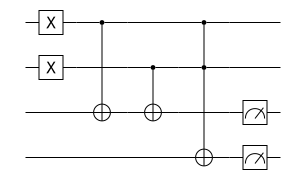

In [6]:
circuit = chain(4, put(1 => X), put(2 => X), control(1, 3 => X),
    control(2, 3 => X), control((1,2),4=>X), Measure(4, locs=3:4))
plot(circuit)

## Wires and registers
A circuit starts with a collection of **wires** that represent a set of qubits. Qubits are ordered from top to bottom, and typically labelled numerically in the same order. We will label starting from 0 to match most quantum programming frameworks. A group of qubits together is called a **quantum register**.

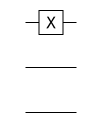

In [9]:
circuit = chain(3, put(1 => X))
plot(circuit)

## Your first quantum circuit

In a circuit, we typically need to do three jobs: First, encode the input, then do some actual computation, and finally extract an output. For your first quantum circuit, we'll focus on the last of these jobs. We start by creating a circuit with eight qubits and eight outputs.

The extraction of outputs in a quantum circuit is done using an operation called $Measure()$. Each measurement tells a specific qubit to give an output to a specific output bit. The command $Measure()$ adds a measurement to each qubit in the circuit qc_output.

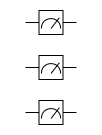

In [79]:
qc_output = chain(3, Measure(3))
plot(qc_output)

We can also specify which qubits we want to measure

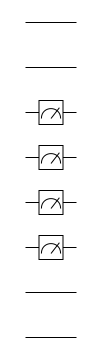

In [80]:
plot(chain(8, Measure(8, locs=3:6)))

Qubits are always initialized to give the output 0. Since we don't do anything to our qubits in the circuit above, this is exactly the result we'll get when we measure them. We can see this by running the circuit many times and plotting the results in a histogram. We will find that the result is always 00000000: a 0 from each qubit.

In [81]:
q1 = ArrayReg(bit"000")

ArrayReg{2, ComplexF64, Array...}
    active qubits: 3/3
    nlevel: 2

We can check some properties, like the state of our qubit

In [82]:
state(q1)

8×1 Matrix{ComplexF64}:
 1.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im

In [84]:
zero_state(3)

ArrayReg{2, ComplexF64, Array...}
    active qubits: 3/3
    nlevel: 2

and we can measure the qubits a number of times to get the average output:

In [85]:
a = (q1 |> qc_output -> measure(qc_output, nshots=1024))

1024-element Vector{DitStr{2, 3, Int64}}:
 000 ₍₂₎
 000 ₍₂₎
 000 ₍₂₎
 000 ₍₂₎
 000 ₍₂₎
 000 ₍₂₎
 000 ₍₂₎
 000 ₍₂₎
 000 ₍₂₎
 000 ₍₂₎
 000 ₍₂₎
 000 ₍₂₎
 000 ₍₂₎
       ⋮
 000 ₍₂₎
 000 ₍₂₎
 000 ₍₂₎
 000 ₍₂₎
 000 ₍₂₎
 000 ₍₂₎
 000 ₍₂₎
 000 ₍₂₎
 000 ₍₂₎
 000 ₍₂₎
 000 ₍₂₎
 000 ₍₂₎

is more convinient to express such measures as histograms, so...

In [101]:
function plotmeasures(x::Array{BitStr{n,Int}, 1}) where n
    hist = fit(Histogram, Int.(x), 0:2^n)
    x = 0
    if (n<=3)
        s=8
    elseif (n>3 && n<=6)
        s=5
    elseif (n>6 && n<=10)
        s=3.2
    elseif (n > 10 && n <=15)
        s=2
    elseif (n>15)
        s=1
    end
    bar(hist.edges[1] .- 0.5, hist.weights, legend=:none, size=(500*(2^n)/s, 400),
        ylims=(0:maximum(hist.weights),), xlims=(0:2^n,), grid=:false,
        ticks=false, border=:none, color=:lightblue, lc=:lightblue)
    scatter!(0:2^n-1, ones(2^n, 1), markersize=0,
        series_annotation="|" .* string.(hist.edges[1]; base=2, pad=n) .* "⟩")
    scatter!(0:2^n-1, zeros(2^n, 1) .+ maximum(hist.weights), markersize=0,
        series_annotation=string.(hist.weights))
end

plotmeasures (generic function with 1 method)

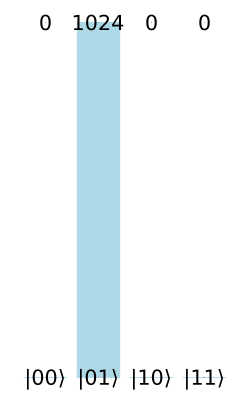

┌ Warning: Invalid limits for x axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ xlims = (0:4,)
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for y axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ ylims = (0:1024,)
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for x axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ xlims = (0:4,)
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for y axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ ylims = (0:1024,)
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for x axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ xlims = (0:4,)
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for y axis. Limits should be a symbol, or a two-eleme

In [102]:
plotmeasures(a)

## Pauli X

The first gate we will explore is the Pauli $X$ gate. This operation is represented by the following unitary matrix $X$:

\begin{align}
& X\vert 0 \rangle = \vert 1 \rangle \\
& X\vert 1 \rangle = \vert 0 \rangle \\
\end{align}
 
This is also known as the **bit flip** operation, or **NOT gate**, due to its similarity to the Boolean NOT operation. From its action on the basis states, it is straightforward to deduce that $X$ should have the following form (you can check this by hand, too):

\begin{align}
& X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \\
\end{align}
 

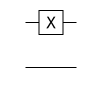

In [103]:
X_gate_qc = chain(2, put(1 => X))
plot(X_gate_qc)

In [104]:
q1 = ArrayReg(bit"00")
st = q1 |> X_gate_qc 

ArrayReg{2, ComplexF64, Array...}
    active qubits: 2/2
    nlevel: 2

In [105]:
state(st)

4×1 Matrix{ComplexF64}:
 0.0 + 0.0im
 1.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im

In [106]:
a = (q1 |> X_gate_qc -> measure(X_gate_qc, nshots=1024));

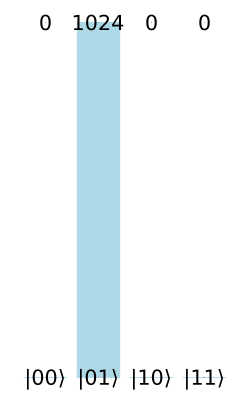

┌ Warning: Invalid limits for x axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ xlims = (0:4,)
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for y axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ ylims = (0:1024,)
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for x axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ xlims = (0:4,)
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for y axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ ylims = (0:1024,)
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for x axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ xlims = (0:4,)
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for y axis. Limits should be a symbol, or a two-eleme

In [107]:
plotmeasures(a)

## Hadamard

The next operation we will meet is one of the most famous in quantum computing: the **Hadamard gate**. It is typically denoted by $H$, and represented as such in a circuit diagram:

\begin{align}
& H =\frac{1}{\sqrt{2}} \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} \\
\end{align}
 


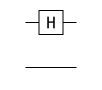

In [108]:
H_gate_qc = chain(2, put(1 => H))
plot(H_gate_qc)

The Hadamard is special because it can create a uniform superposition of the two states $\vert 0 \rangle$ and $\vert 1\rangle$:
\begin{align}
& H\vert 0\rangle =\frac{1}{\sqrt{2}} (\vert 0\rangle + \vert 1\rangle)
& H\vert 1\rangle =\frac{1}{\sqrt{2}} (\vert 0\rangle - \vert 1\rangle)
\end{align}
 

In [109]:
q1 = ArrayReg(bit"00")
st = q1 |> H_gate_qc

ArrayReg{2, ComplexF64, Array...}
    active qubits: 2/2
    nlevel: 2

In [110]:
state(st)

4×1 Matrix{ComplexF64}:
 0.7071067811865475 + 0.0im
 0.7071067811865475 + 0.0im
                0.0 + 0.0im
                0.0 + 0.0im

In [112]:
a = (q1 |> H_gate_qc -> measure(H_gate_qc, nshots=1024));

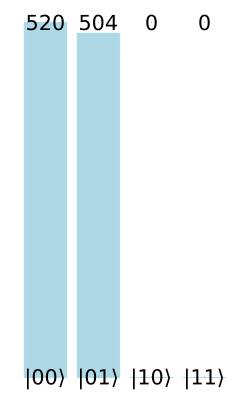

┌ Warning: Invalid limits for x axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ xlims = (0:4,)
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for y axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ ylims = (0:520,)
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for x axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ xlims = (0:4,)
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for y axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ ylims = (0:520,)
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for x axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ xlims = (0:4,)
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for y axis. Limits should be a symbol, or a two-element

In [113]:
plotmeasures(a)

# It's just a phase

Both the $X$ and the $H$ gate we previously saw affected which basis states appeared in the superposition. We know how to flip the states using $X$, and how to create uniform superpositions. But, how can we change the amplitudes more generally? How do we change their relative magnitudes? In this section, we will learn about operations that change the phase of the amplitudes of a superposition.


## Global and relative phases

Let's consider an arbitrary quantum state

$$ \vert\psi\rangle = \alpha\vert 0 \rangle + \beta\vert 1\rangle$$

and separate out the real and complex components of the amplitudes by writing them in polar form, i.e., $\alpha = ae^{i\gamma}$ ,$\beta = be^{i\phi}$ . We can factor out the complex part:

$$ \vert\psi\rangle = ae^{i\gamma}\vert 0 \rangle + be^{i\phi}\vert 1\rangle = e^{i\gamma}(a\vert 0\rangle + be^{i(\phi -\gamma)}\vert 1\rangle)$$

Notice how the term $e^{i\gamma}$ out front doesn't affect the measurement outcome probabilities at all! Without loss of generality, we can totally ignore this **global phas**e, and describe exactly the same quantum state:

$$\vert \psi \rangle = a\vert 0\rangle + be^{i(\phi -\gamma)}\vert 1\rangle = a\vert 0\rangle + be^{i\phi}\vert 1\rangle$$

This remaining complex value, $e^{i\phi}$ is known as a **relative phase**. If you look at the measurement outcome probabilities of $\vert 0\rangle$ and $\vert 1\rangle$, you might notice that this phase doesn't affect them either; we will learn later, though, that it can affect the measurement outcomes if the measurements are performed in a different way.


## Z rotations

The $RZ$ gate, or "$Z$ rotation" is a quantum gate that modifies the relative phase between $\vert 0 \rangle$ and $\vert 1 \rangle$. Given some initial state $\vert\psi\rangle = \alpha\vert 0\rangle + \beta\vert 1\rangle$, a  rotation by the amount  (an angle in radians) is

$$RZ(\omega)\vert \psi\rangle = \alpha \vert 0\rangle + \beta e^{i\omega} \vert 1\rangle$$

The matrix representation of $RZ$ is a bit counter-intuitive at first:

\begin{align}
& RZ(\omega) = \begin{bmatrix} e^{\frac{-i\omega}{2}} & 0 \\ 0 & e^{\frac{\omega}{2}} \end{bmatrix} \\
\end{align}
 


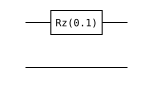

In [114]:
RZ_qc = chain(2, put(1 => Rz(0.1)))
plot(RZ_qc)

In [117]:
q0 = ArrayReg(bit"00")
st = q0 |> RZ_qc

ArrayReg{2, ComplexF64, Array...}
    active qubits: 2/2
    nlevel: 2

In [118]:
state(st)

4×1 Matrix{ComplexF64}:
 0.9987502603949663 - 0.04997916927067833im
                0.0 + 0.0im
                0.0 + 0.0im
                0.0 + 0.0im

In [119]:
a = (q0 |> RZ_qc -> measure(RZ_qc, nshots=1024));

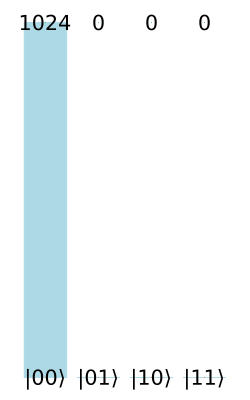

┌ Warning: Invalid limits for x axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ xlims = (0:4,)
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for y axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ ylims = (0:1024,)
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for x axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ xlims = (0:4,)
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for y axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ ylims = (0:1024,)
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for x axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ xlims = (0:4,)
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for y axis. Limits should be a symbol, or a two-eleme

In [120]:
plotmeasures(a)

# Z, S, and T
There are three special cases of $RZ$ that correspond to very commonly-used quantum gates: $Z$, $S$, and $T$.


The case where $\omega = \pi$ is known as a Pauli $Z$ operation.

In [14]:
Zgate = Rz(π)

rot(Z, π)

Another well-known case is $\omega = \pi/2$. This gate is known colloquially as the phase gate and is denoted by $S$.

In [13]:
Sgate = Rz(π/2)

rot(Z, 1.5707963267948966)

the S-gate is not its own inverse! As a result, you will often see the S†-gate, (also “S-dagger”, “Sdg” or $S^{\dagger}$-gate). The $S^{\dagger}$-gate is clearly an RZ-gate with $\omega = -\pi/2$:

In [15]:
Sdagger_gate = Rx(-π/2)

rot(X, -1.5707963267948966)

Finally, the case where $\omega = \pi/4$ is known as the $T$ gate. The $T$ gate is sometimes referred to as the "pi over 8 gate" due to how its matrix representation looks.


\begin{align}
& RZ(\pi/4) = \begin{bmatrix} e^{\frac{-i\pi}{8}} & 0 \\ 0 & e^{\frac{i\pi}{8}} \end{bmatrix} \\
\end{align}

The T-gate is sometimes also known as the $\sqrt[4]{Z}$-gate.

In [16]:
Tgate = Rz(π/4)

rot(Z, 0.7853981633974483)

## Remember the Bloch sphere?

<div>
<center>
<img src="https://logosconcarne.files.wordpress.com/2021/03/bloch-sphere.png" width="700"/>
</center>
</div>

$$ \vert \psi\rangle = \cos\left(\frac{\theta}{2}\right)\vert 0\rangle + e^{i\phi}\sin\left(\frac{\theta}{2}\right) \vert 1\rangle$$

There are the usual three axes: $x$, $y$, and $z$. Along the $z$ axis, the top-most state corresponds to $\vert 0\rangle$, and the bottom to $\vert 1\rangle$; these are the eigenvectors of the Pauli $Z$ operator. Similarly, along the $x$ axis are the $\vert +\rangle$  and $\vert -\rangle$  states, which are the eigenvectors of the Pauli $X$ operator. 

$RX$, $RY$, and $RZ$ rotate the qubit's state vector about the appropriate axis.

## RX and RY

Now that we have some intuition about what these rotations are, we can begin to express $RX$ and $RY$ in terms of matrices and describe how they act on the basis states.

The matrix representation of an $X$ rotation is

\begin{align}
& RX(\theta) = \begin{bmatrix} \cos\left(\frac{\theta}{2}\right) & -i\sin\left(\frac{\theta}{2}\right) \\ -i\sin\left(\frac{\theta}{2}\right) & \cos\left(\frac{\theta}{2}\right) \end{bmatrix} \\
\end{align}


The matrix representation of a $Y$ rotation looks very similar to that of $RX$, however there is no complex component:


\begin{align}
& RY(\theta) = \begin{bmatrix} \cos\left(\frac{\theta}{2}\right) & -\sin\left(\frac{\theta}{2}\right) \\ -\sin\left(\frac{\theta}{2}\right) & \cos\left(\frac{\theta}{2}\right) \end{bmatrix} \\
\end{align}

## The CNOT gate

The most important entangling gate is the **controlled-NOT**, or **CNOT gate**. This is a two-qubit gate that performs an operation (specifically, a Pauli $X$ or "NOT" gate) on one qubit depending on the state of another.

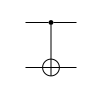

In [8]:
cnot_circuit = chain(2, cnot(2, 1, 2))
plot(cnot_circuit)

Its matrix representation is

\begin{align}
& CNOT = \begin{bmatrix} 1 & 0 & 0 & 0 \\
 0 & 1 & 0 & 0 \\
 0 & 0 & 0 & 1 \\
 0 & 0 & 1 & 0 \\
\end{bmatrix} \\
\end{align}

In [24]:
q0 = ArrayReg(bit"11")

ArrayReg{2, ComplexF64, Array...}
    active qubits: 2/2
    nlevel: 2

In [25]:
state(q0)

4×1 Matrix{ComplexF64}:
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 1.0 + 0.0im

In [26]:
st = q0 |> cnot_circuit

ArrayReg{2, ComplexF64, Array...}
    active qubits: 2/2
    nlevel: 2

In [27]:
state(st)

4×1 Matrix{ComplexF64}:
 0.0 + 0.0im
 1.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im

In [28]:
state(ArrayReg(bit"01"))

4×1 Matrix{ComplexF64}:
 0.0 + 0.0im
 1.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im

## Controlled-Z

The **controlled-$Z$** gate is similar in spirit to the controlled-NOT gate. The difference is that rather than applying an $X$ controlled on a qubits state, we apply a $Z$. Its matrix representation is


\begin{align}
& CZ = \begin{bmatrix} 1 & 0 & 0 & 0 \\
 0 & 1 & 0 & 0 \\
 0 & 0 & 1 & 0 \\
 0 & 0 & 0 & -1 \\
\end{bmatrix} \\
\end{align}

The controlled-$Z$ gate is also known as the $CZ$ gate, or the **controlled phase gate**.

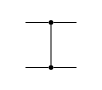

In [30]:
cz_circuit = chain(2, cz(2, 1, 2))
plot(cz_circuit)

In [36]:
q0 = ArrayReg(bit"01")

ArrayReg{2, ComplexF64, Array...}
    active qubits: 2/2
    nlevel: 2

In [37]:
state(q0)

4×1 Matrix{ComplexF64}:
 0.0 + 0.0im
 1.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im

In [38]:
st = q0 |> cz_circuit

ArrayReg{2, ComplexF64, Array...}
    active qubits: 2/2
    nlevel: 2

In [39]:
state(st)

4×1 Matrix{ComplexF64}:
  0.0 + 0.0im
  1.0 + 0.0im
  0.0 + 0.0im
 -0.0 - 0.0im

## The SWAP gate

The SWAP gate is exactly what it sounds like: it exchanges the state of two qubits:

$$ SWAP(\vert \psi \rangle \otimes \vert \phi \rangle) = \vert \phi \rangle \otimes \vert \psi \rangle $$

the matrix representation is
\begin{align}
& SWAP = \begin{bmatrix} 1 & 0 & 0 & 0 \\
 0 & 0 & 1 & 0 \\
 0 & 1 & 0 & 0 \\
 0 & 0 & 0 & 1 \\
\end{bmatrix} \\
\end{align}


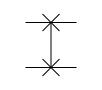

In [121]:
swap_circ = chain(2, swap(1,2))
plot(swap_circ)

In [129]:
q0 = ArrayReg(bit"01")

ArrayReg{2, ComplexF64, Array...}
    active qubits: 2/2
    nlevel: 2

In [130]:
state(q0)

4×1 Matrix{ComplexF64}:
 0.0 + 0.0im
 1.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im

In [131]:
st = q0 |> swap_circ

ArrayReg{2, ComplexF64, Array...}
    active qubits: 2/2
    nlevel: 2

In [132]:
state(st)

4×1 Matrix{ComplexF64}:
 0.0 + 0.0im
 0.0 + 0.0im
 1.0 + 0.0im
 0.0 + 0.0im

In [133]:
a = (q0 |> swap_circ -> measure(swap_circ, nshots=1024));

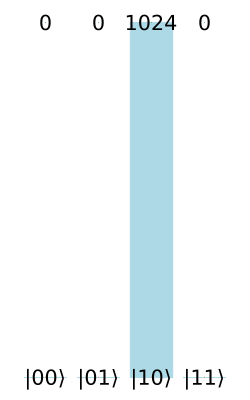

┌ Warning: Invalid limits for x axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ xlims = (0:4,)
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for y axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ ylims = (0:1024,)
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for x axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ xlims = (0:4,)
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for y axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ ylims = (0:1024,)
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for x axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ xlims = (0:4,)
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for y axis. Limits should be a symbol, or a two-eleme

In [134]:
plotmeasures(a)

## The Toffoli gate

he Toffoli has two control qubits, and behaves effectively like a controlled-CNOT, or controlled-NOT. Its matrix representation is below:

\begin{align}
& TOF = \begin{bmatrix} 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\
 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
\end{bmatrix} \\
\end{align}


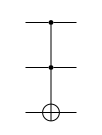

In [135]:
tof_cric = chain(3, cnot(3, (1,2), 3))
plot(tof_cric)

In [136]:
q0 = ArrayReg(bit"011")

ArrayReg{2, ComplexF64, Array...}
    active qubits: 3/3
    nlevel: 2

In [137]:
state(q0)

8×1 Matrix{ComplexF64}:
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 1.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im

In [138]:
st = q0 |> tof_cric

ArrayReg{2, ComplexF64, Array...}
    active qubits: 3/3
    nlevel: 2

In [139]:
state(st)

8×1 Matrix{ComplexF64}:
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 1.0 + 0.0im

In [140]:
a = (q0 |> tof_cric -> measure(tof_cric, nshots=1024));

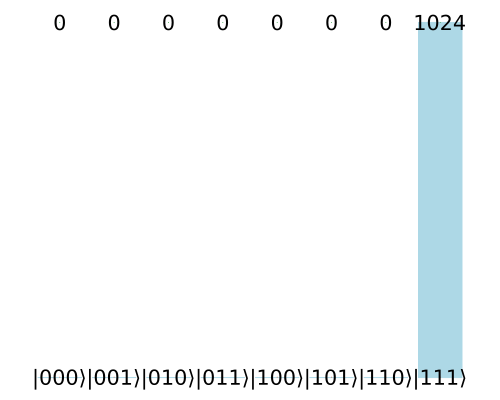

┌ Warning: Invalid limits for x axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ xlims = (0:8,)
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for y axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ ylims = (0:1024,)
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for x axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ xlims = (0:8,)
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for y axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ ylims = (0:1024,)
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for x axis. Limits should be a symbol, or a two-element tuple or vector of numbers.
│ xlims = (0:8,)
└ @ Plots ~/.julia/packages/Plots/modjX/src/axes.jl:628
┌ Warning: Invalid limits for y axis. Limits should be a symbol, or a two-eleme

In [141]:
plotmeasures(a)

# END of intro

![]()

<div>
<center>
<img src="https://geeksoncoffee.com/wp-content/uploads/2019/10/gaben_o_5591569.jpg" width="700"/>
</center>
</div>